In [1]:
import pandas as pd
traf = pd.read_csv('Forbes-Project.csv')
TMC = pd.read_csv('TMC_Identification_REVISED.csv')
air = pd.read_csv('new_pm25.csv')

In [2]:
forbes = TMC.loc[TMC.road == 'FORBES AVE',:]
traf = traf.loc[traf.confidence_score >= 30 , :]
EST = forbes.loc[forbes.direction == 'EASTBOUND',:]
WST = forbes.loc[forbes.direction == 'WESTBOUND',:]

In [3]:
traf.rename(columns={'tmc_code':'tmc'}, inplace = True)

In [4]:
main1 = pd.merge(EST,traf,on= 'tmc', how = 'inner')
main2 = pd.merge(WST,traf,on= 'tmc', how = 'inner')

In [5]:
main1.rename(columns={'measurement_tstamp':'Date'}, inplace=True)
main2.rename(columns={'measurement_tstamp':'Date'}, inplace=True)
air.rename(columns={'DATE':'Date'}, inplace = True)
import datetime as dt
main1['Date'] = pd.to_datetime(main1['Date'])
main2['Date'] = pd.to_datetime(main2['Date'])
air['Date'] = pd.to_datetime(air['Date'])


In [6]:
main1 = main1.groupby(pd.Grouper(key = 'Date',freq = '1H')).mean()
main2 = main2.groupby(pd.Grouper(key = 'Date',freq = '1H')).mean()

In [7]:
main1 = main1.reset_index()
main2 = main2.reset_index()

In [8]:
main1['hour'] = main1['Date'].dt.hour 
main2['hour'] = main2['Date'].dt.hour

In [9]:
air1 = air.loc[air.CONC != 0.0 ,:]

In [10]:
EAST = pd.merge(main1,air1,on= 'Date', how = 'inner')
WEST = pd.merge(main2,air1,on= 'Date', how = 'inner')

In [11]:
import datetime
t1 = pd.to_datetime('1-1-2017')
t2 = pd.to_datetime('3-7-2018')
t3 = pd.to_datetime('5-21-2018')
t4 = pd.to_datetime('8-14-2018')
t5 = pd.to_datetime('3-22-2019')
t6 = pd.to_datetime('04-06-2019')

In [12]:
traf1= EAST[EAST["Date"].between(t1,t4)]
traf2= EAST[EAST["Date"].between(t4,t5)]
traf3= EAST[EAST["Date"].between(t5,t6)]
traf4= WEST[WEST["Date"].between(t2,t3)]
traf5= WEST[WEST["Date"].between(t3,t4)]
traf6= WEST[WEST["Date"].between(t4,t5)]

In [13]:
traf1 = traf1.append(traf3)
traf5 = traf5.append(traf6)

In [26]:
traf5.cov()

,zip,start_latitude,start_longitude,end_latitude,end_longitude,miles,road_order,active_end_date,Unnamed: 18,speed,average_speed,reference_speed,travel_time_minutes,confidence_score,cvalue,hour,CONC
zip,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
start_latitude,0.0,5.256161e-25,-2.164302e-24,-4.483196e-25,1.607767e-24,7.085511e-27,0.0,NaN,NaN,1.555532e-26,-2.123940e-28,1.129582e-27,-5.720811e-28,0.0,8.264350e-27,-2.936153e-28,2.521944e-27
start_longitude,0.0,-2.164302e-24,8.911830e-24,1.846022e-24,-6.620216e-24,-2.917563e-26,0.0,NaN,NaN,-6.567715e-26,1.826428e-26,-4.112991e-27,2.672368e-27,0.0,-3.578611e-26,3.162340e-27,-9.627099e-27
end_latitude,0.0,-4.483196e-25,1.846022e-24,3.823903e-25,-1.371331e-24,-6.043524e-27,0.0,NaN,NaN,-1.351112e-26,1.710803e-27,-9.828244e-28,5.326004e-28,0.0,-7.102075e-27,3.300410e-28,-1.919045e-27
end_longitude,0.0,1.607767e-24,-6.620216e-24,-1.371331e-24,4.917875e-24,2.167333e-26,0.0,NaN,NaN,4.874924e-26,-3.948439e-27,3.245838e-27,-2.050754e-27,0.0,2.622329e-26,-1.227225e-27,6.841604e-27
miles,0.0,7.085511e-27,-2.917563e-26,-6.043524e-27,2.167333e-26,9.551547e-29,0.0,NaN,NaN,2.180782e-28,-1.092478e-29,1.531478e-29,-8.459330e-30,0.0,1.245856e-28,-9.996772e-30,2.836970e-29
road_order,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
active_end_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speed,0.0,1.555532e-26,-6.567715e-26,-1.351112e-26,4.874924e-26,2.180782e-28,0.0,NaN,NaN,5.765108e+00,2.949991e-01,-1.076606e-02,-1.380290e+00,0.0,-8.213036e-01,2.517873e-01,-2.226510e-01


Text(0,0.5,'Concentration PM2.5')

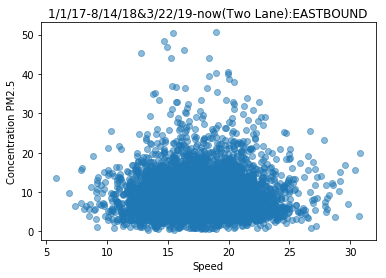

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y = traf1['CONC']
x = traf1['speed']
plt.scatter(x, y, alpha=0.5)
plt.title('1/1/17-8/14/18&3/22/19-now(Two Lane):EASTBOUND')
plt.xlabel('Speed')
plt.ylabel('Concentration PM2.5')

Text(0,0.5,'Concentration PM2.5')

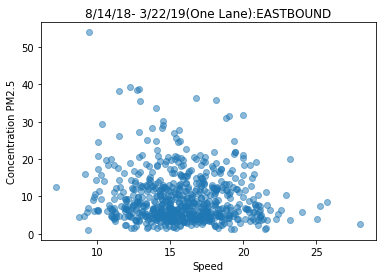

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
y = traf2['CONC']
x = traf2['speed']
plt.scatter(x, y, alpha=0.5)
plt.title('8/14/18- 3/22/19(One Lane):EASTBOUND')
plt.xlabel('Speed')
plt.ylabel('Concentration PM2.5')

Text(0,0.5,'Concentration PM2.5')

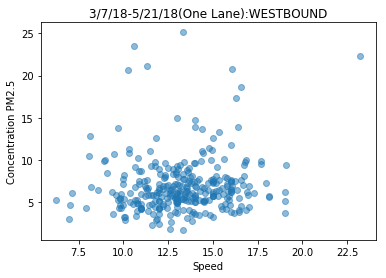

In [21]:
y = traf4['CONC']
x = traf4['speed']
plt.scatter(x, y, alpha=0.5)
plt.title('3/7/18-5/21/18(One Lane):WESTBOUND')
plt.xlabel('Speed')
plt.ylabel('Concentration PM2.5')

Text(0,0.5,'Concentration PM2.5')

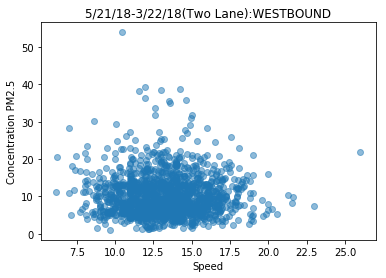

In [22]:
y = traf5['CONC']
x = traf5['speed']
plt.scatter(x, y, alpha=0.5)
plt.title('5/21/18-3/22/18(Two Lane):WESTBOUND')
plt.xlabel('Speed')
plt.ylabel('Concentration PM2.5')

